# **LetsGrowMore Virtual Internship Program**
# Author :- Vedant Gadhavi
# Intermediate Level
# Task 2 :- Prediction using Decision Tree Algorithm


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Data Science/Iris.csv")

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.size

900

In [6]:
data.shape

(150, 6)

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
data = data.drop(columns = ['Id'])

In [13]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# **DATA** **VISUALIZATION**

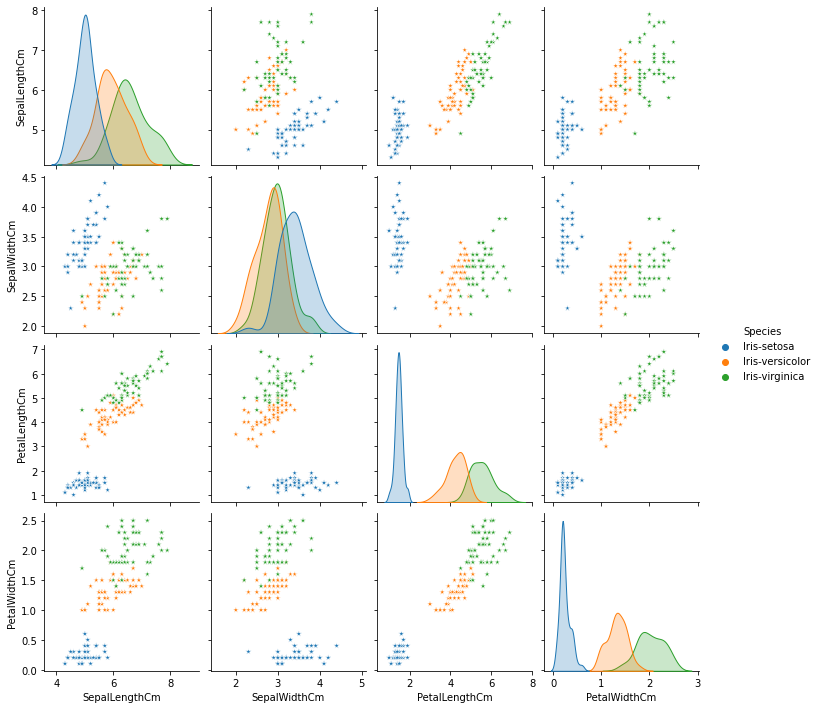

In [14]:
sns.pairplot(data, hue='Species', markers='*')
plt.show()

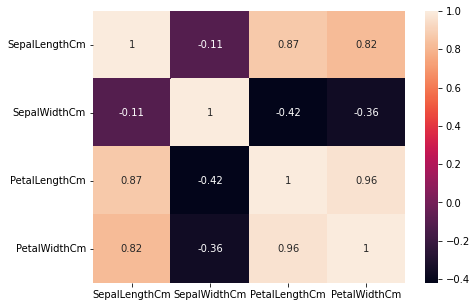

In [15]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

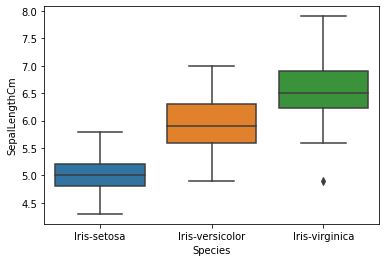

In [16]:
sns.boxplot(x="Species",y="SepalLengthCm",data=data)
plt.show()

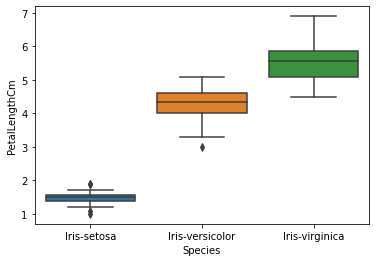

In [17]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data)
plt.show()

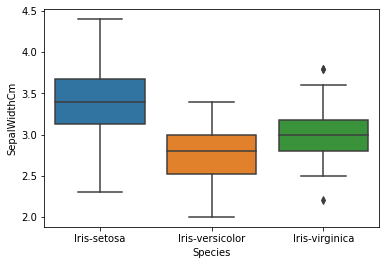

In [18]:
sns.boxplot(x="Species",y="SepalWidthCm",data=data)
plt.show()

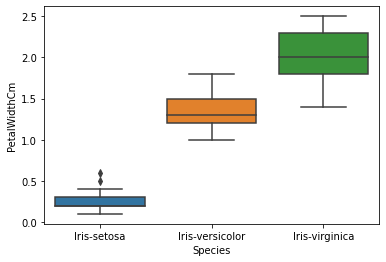

In [19]:
sns.boxplot(x="Species",y="PetalWidthCm",data=data)
plt.show()

# **MACHINE LEARNING MODELLING**

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = data.iloc[:,4].values
data.iloc[:,4] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
X = data[['SepalLengthCm' ,'SepalWidthCm' ,'PetalLengthCm' ,'PetalWidthCm']]
y = data[['Species']]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

In [23]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(112, 4) (38, 4) (112, 1) (38, 1)


In [24]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
Decision_tree = DecisionTreeClassifier()
Decision_tree.fit(X_train,Y_train)

prediction = Decision_tree.predict(X_test)
prediction

array([0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

0.8947368421052632


In [26]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names = target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.86      0.86      0.86        14
 Iris-virginica       0.85      0.85      0.85        13

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.89      0.89      0.89        38



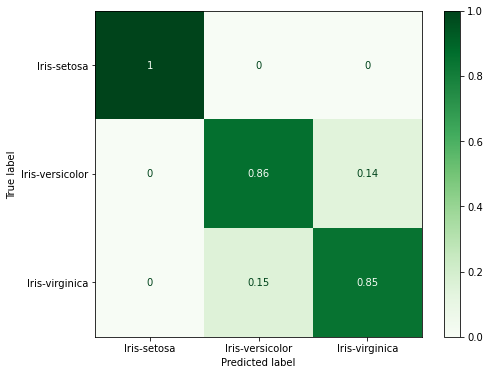

In [27]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')